# MD004 ENTREGA5 ANOVA

### <font color='#3d59c6'> PARTE I </font>

Imagina que te llega un conjunto de datos que contiene tres variables categóricas>> A,B y C (con 2 categorías cada una). ¿Podrías plantear una estrategia que recoja los 3 factores realizando un Two-Way ANOVA? ¿y un One-Way ANOVA? ¿Qué consideraciones tendrías en cuenta al diseñar estos análisis? (2pt)

Aplicando el método Two-way ANOVA se deberían de realizar múltiples análisis para cada para de variables (A y B, A y C, B y C), ignorando la tercera variable en cada análisis para poder ver las interacciones entre cada pareja de variables. 

Aplicando el método One-way ANOVA se deberían de realizar tres análisis separados, uno para cada factor (A,B y C), ignorando los otros dos factores y asumiendo que no influyen. Así pues, cada ANOVA compararía las medias de las dos cateforías dentro de cada variable en relación con la variable dependiente.

Para ambos métodos se necesitan hacer las comprobaciones de normalidad y homcedasticidad.

Si se quiere plantear una estrategia para realizarlo con un solo análisis, habría que usar un Three-way ANOVA.

### <font color='#3d59c6'> PARTE II </font>

Se dispone del siguiente dataset que contiene en formato csv registros de diferentes deportistas y donde se recoge el valor de las siguientes variables teniendo como factores deporte y género:

- rcc: glóbulos rojos
- wcc: células blancas en la sangre
- hc: hematocritos(%)
- hg: concentración de hemoglobina, en gr por decalitro
- bmi: indice masa corporal
- sex: 2 categorías >> f m
- sport: 9 categorías >> B_Ball Netball Row Swim T_400m T_Sprnt Tennis W_Polo


###### Data: 
202401_ais.csv

(selección de >> origen:https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

###### Se pide:

1. Visualización y comprensión del dataset (2p): Se pide visualizar y realizar estadísticos que ayuden a comprender mejor el dataset dentro del dominio de ANOVA: Análisis descriptivo de las variables continuas y de nuestros factores y análisis de correlaciones
2. Calcular la prueba ANOVA One-Way para la variable sport respecto 2 variables continuas (escoged). Interpretar resultados y acompañar con los gráficos vistos en clase (3p)
3. Calcular la prueba ANOVA Two-Way con ambos factores respecto 2 variables continuas (diferentes a las anteriores): comentad todo lo que observeis, ¿es sport significativa?¿y sex? ¿y conjuntamente? (3p)

;) Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br> 
<div>
<img src="attachment:image-3.png" width="500"/>
</div>



## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área
- **ggplot2**: la usamos para crear gráficos más personalizables o dico de otra maenra, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables.

In [ ]:
library(olsrr)
library(tidyverse)
library(caret)
library(lmtest)
library(gridExtra)
library(broom)
library(dplyr)
library(ggplot2)
library(corrplot)

## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [14]:
data_ais = read.csv(file='202401_ais.csv', header=TRUE, sep=';', dec='.')

## <font color='#3d59c6'>  2. ANALÍSIS DESCRIPTIVO </font>

In [15]:
head(data_ais)#de forma predefinida retorna las primeras 6 observations
tail(data_ais)#de forma predefinida retorna las últimas 6 observations
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data_ais)
summary(data_ais)
na_counts_per_column <- colSums(is.na(data_ais))
print(na_counts_per_column)

,rownames,rcc,wcc,hc,hg,bmi,sex,sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,3.96,7.5,37.5,12.3,20.56,f,B_Ball
2,2,4.41,8.3,38.2,12.7,20.67,f,B_Ball
3,3,4.14,5.0,36.4,11.6,21.86,f,B_Ball
4,4,4.11,5.3,37.3,12.6,21.88,f,B_Ball
5,5,4.45,6.8,41.5,14.0,18.96,f,B_Ball
6,6,4.10,4.4,37.4,12.5,21.04,f,B_Ball


,rownames,rcc,wcc,hc,hg,bmi,sex,sport
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
119,173,5.49,5.9,47.7,15.9,22.28,m,T_400m
120,175,5.03,6.6,44.7,15.9,19.85,m,T_400m
121,199,5.66,8.3,50.2,17.7,23.76,m,Tennis
122,200,5.03,6.4,42.7,14.3,22.01,m,Tennis
123,201,4.97,8.8,43.0,14.9,22.34,m,Tennis
124,202,5.38,6.3,46.0,15.7,21.07,m,Tennis


'data.frame':	124 obs. of  8 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ rcc     : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc     : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc      : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg      : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ bmi     : num  20.6 20.7 21.9 21.9 19 ...
 $ sex     : chr  "f" "f" "f" "f" ...
 $ sport   : chr  "B_Ball" "B_Ball" "B_Ball" "B_Ball" ...


    rownames           rcc             wcc               hc       
 Min.   :  1.00   Min.   :3.900   Min.   : 3.300   Min.   :36.40  
 1st Qu.: 31.75   1st Qu.:4.360   1st Qu.: 5.800   1st Qu.:40.98  
 Median : 98.50   Median :4.695   Median : 6.600   Median :43.15  
 Mean   : 89.99   Mean   :4.676   Mean   : 6.613   Mean   :43.00  
 3rd Qu.:131.25   3rd Qu.:5.005   3rd Qu.: 7.500   3rd Qu.:45.23  
 Max.   :202.00   Max.   :5.660   Max.   :10.100   Max.   :50.20  
       hg             bmi            sex               sport          
 Min.   :11.60   Min.   :16.75   Length:124         Length:124        
 1st Qu.:13.78   1st Qu.:20.80   Class :character   Class :character  
 Median :14.60   Median :22.33   Mode  :character   Mode  :character  
 Mean   :14.52   Mean   :22.29                                        
 3rd Qu.:15.40   3rd Qu.:23.73                                        
 Max.   :17.70   Max.   :26.79                                        

rownames      rcc      wcc       hc       hg      bmi      sex    sport 
       0        0        0        0        0        0        0        0 


En una primera observación, podemos ver que no tenemos nulos, y que los valores parece seguir una distribución bastante normal. No hay valores muiy extremos en general. Y además los valores mediana y media soon muy parecidos lo que nos indica poca dispersión.

In [11]:
table(data_ais$sex)
table(data_ais$sport)


 f  m 
62 62 


B_Ball    Row   Swim T_400m Tennis 
    25     37     22     29     11 

Vemos como el sexo si que esta balanceado, pero el deporte no lo está tanto. Debido a que tenemos pocas muestras, menos de 30 por categoria (excepto en Row), nos quedaremos con el dataset como está. 

In [18]:
data_ais_numeric = data_ais %>%
  select_if(is.numeric)

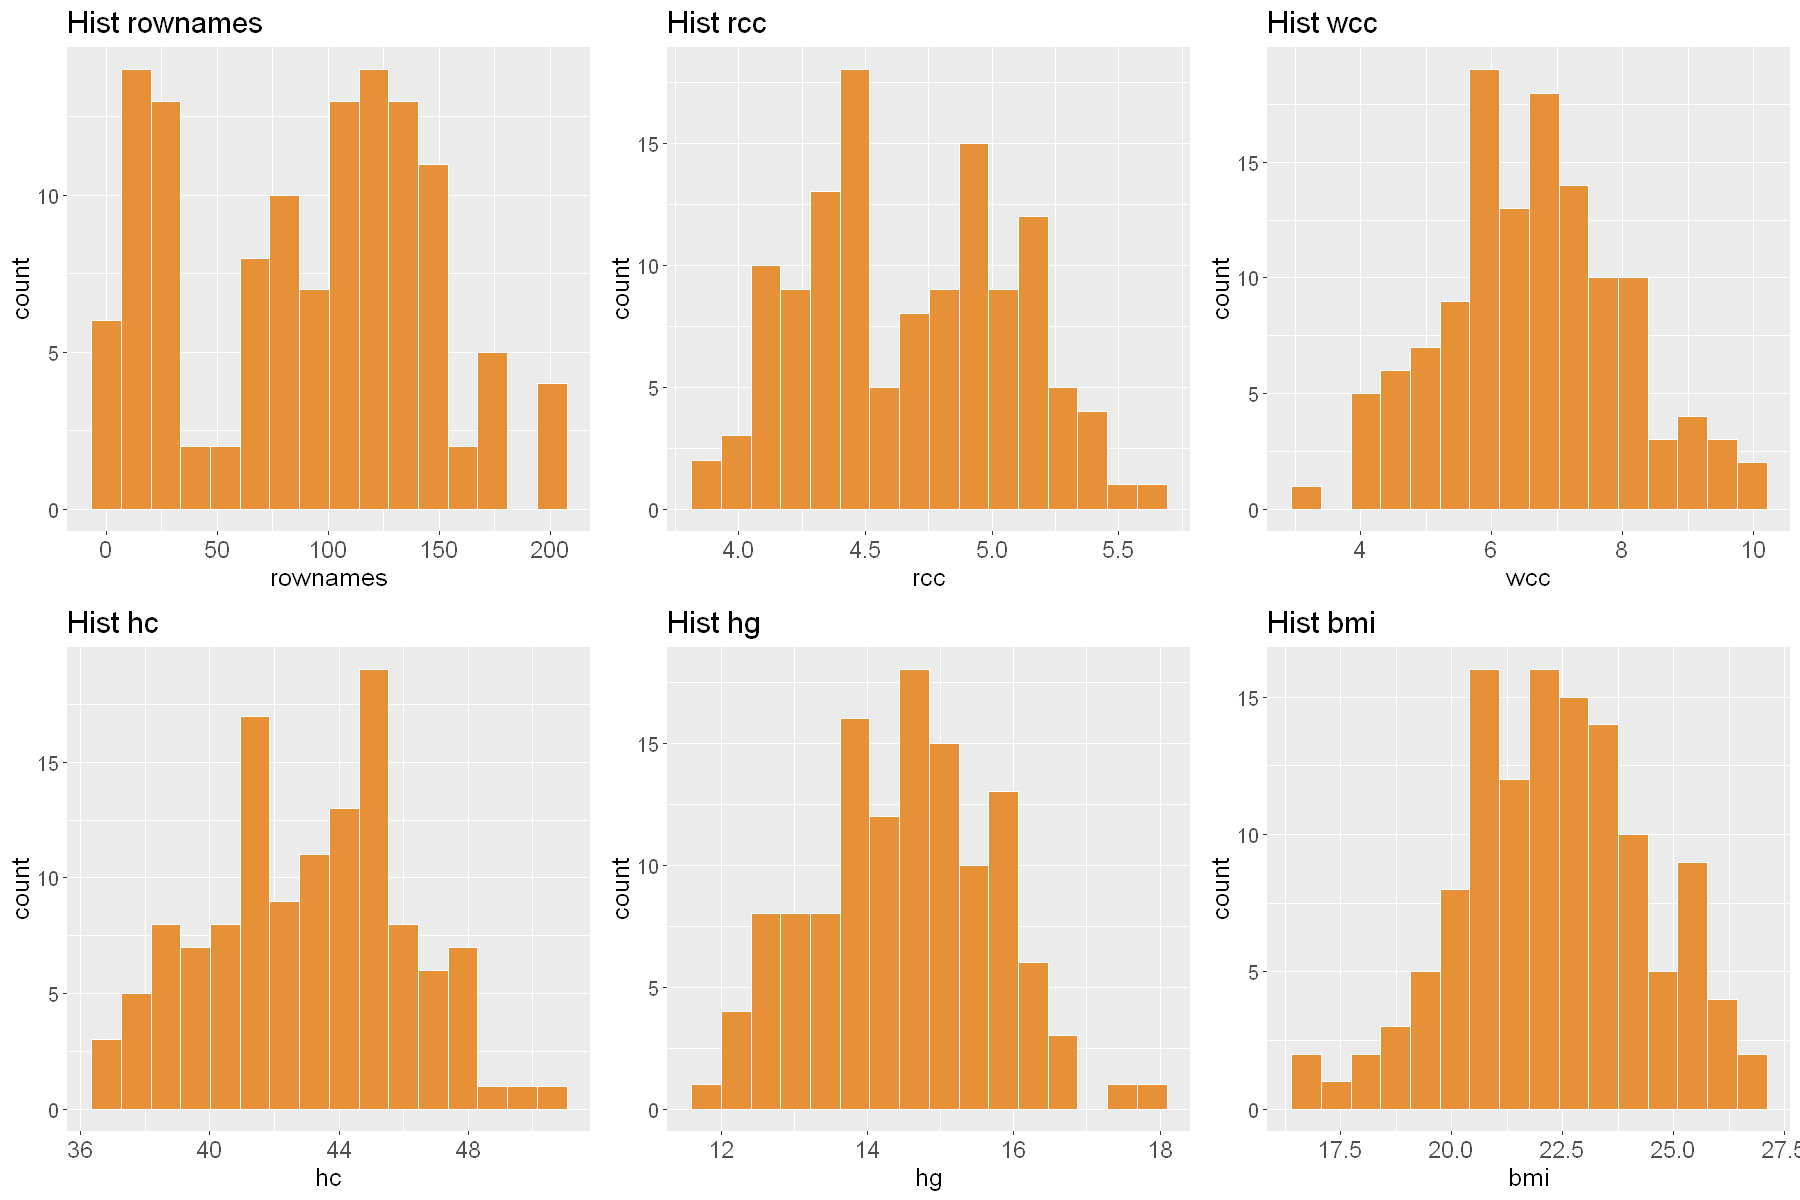

In [20]:
graficos_histograma = list()
var_data = colnames(data_ais_numeric)

for (variable in var_data) {

  grafico = ggplot(data_ais_numeric) +
    aes_string(x = variable) +
    geom_histogram(bins = 16, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

Vemos como sin tener en cuenta rownames, aparentemente no siguen una distribución normal.

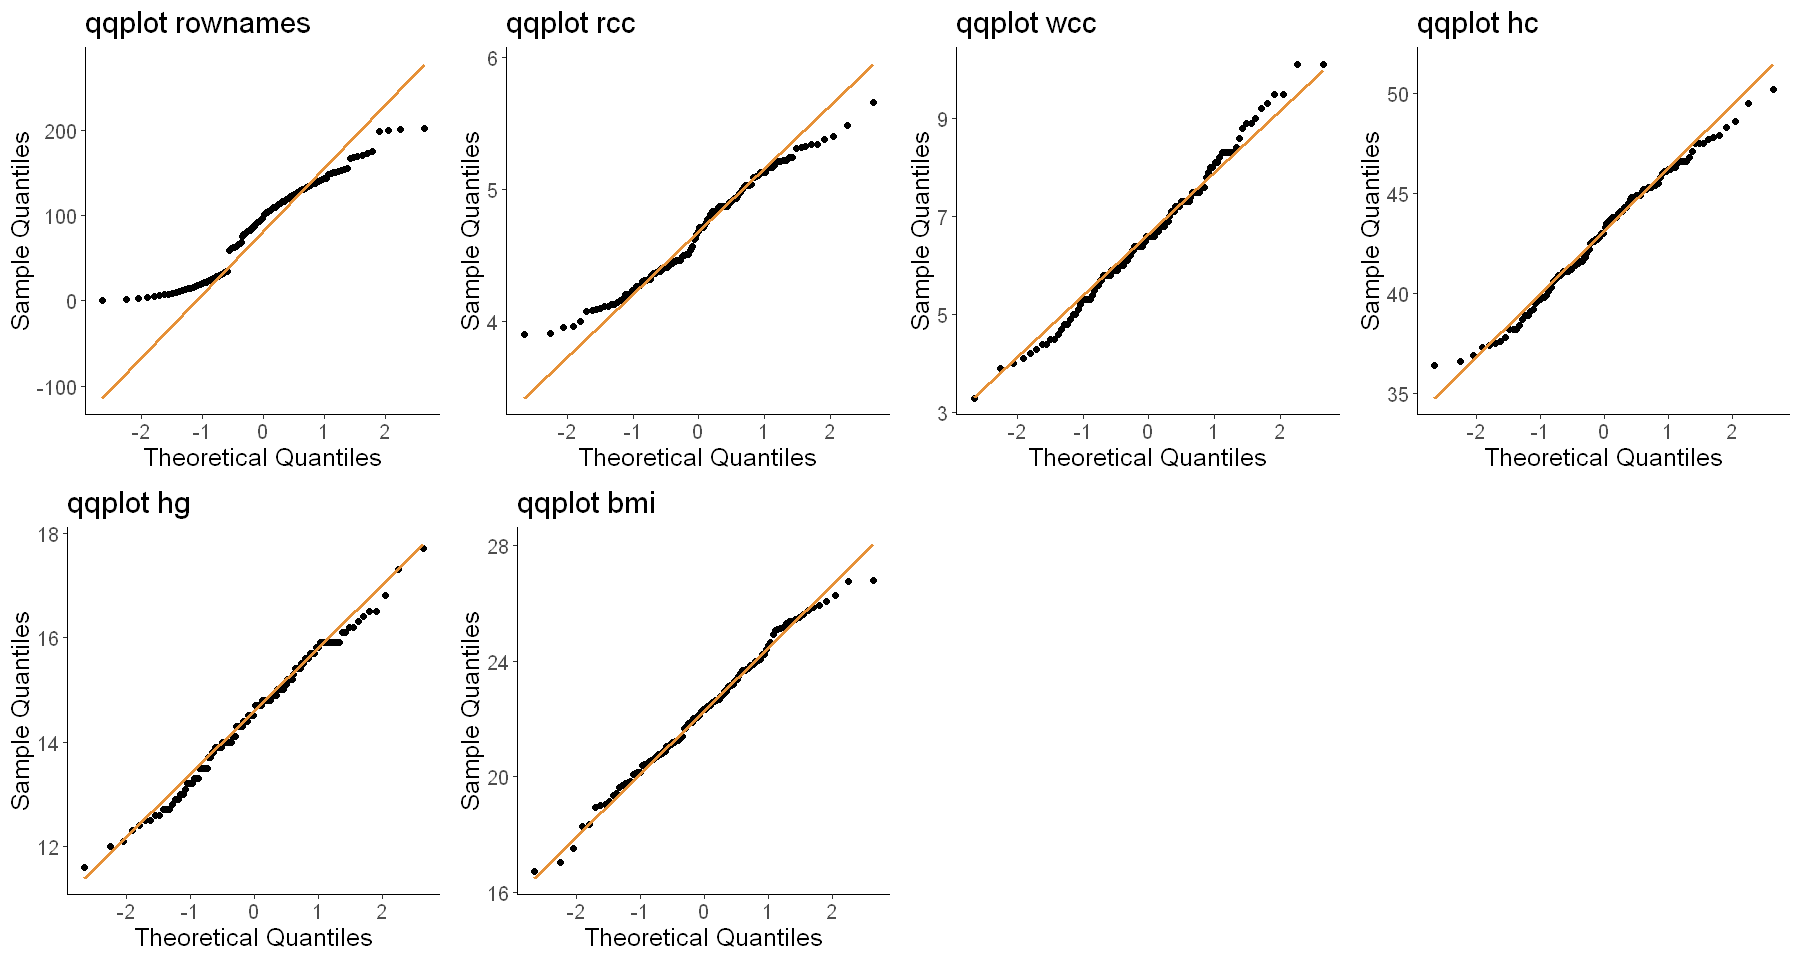

In [43]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data_ais_numeric)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data_ais_numeric[!is.na(data_ais_numeric[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Sin embargo, si analizamos el qqplot, vemos como rcc no sigue una distribución normal, pero podríamos decir que el resto, aparentemente si que siguien una distribución normal.

In [38]:
library(rlang) # para sym()


Attaching package: 'rlang'


The following objects are masked from 'package:purrr':

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice




In [42]:
#A continuación miramos las caracteristicas pero agrupadas por la columna Sex
var_data = colnames(data_ais_numeric)

for (variable in var_data){
    df <- data_ais %>% 
            group_by(sex) %>% 
            summarize (
                ds= sd(!!sym(variable), na.rm = TRUE),
                var = var(!!sym(variable), na.rm = TRUE),
                min = min(!!sym(variable), na.rm = TRUE),
                max = max(!!sym(variable), na.rm = TRUE),
                med = median(!!sym(variable), na.rm = TRUE),
                media = mean(!!sym(variable), na.rm = TRUE),
                Q1 = quantile(!!sym(variable), na.rm = TRUE, probs = c(0.25)),
                Q2 = quantile(!!sym(variable), na.rm = TRUE, probs = c(0.5)),
                Q3 = quantile(!!sym(variable), na.rm = TRUE, probs = c(0.75))
            )
    print(variable)
    print(df)
    
}


[1] "rownames"
# A tibble: 2 × 10
  sex      ds   var   min   max   med media    Q1    Q2    Q3
  <chr> <dbl> <dbl> <int> <int> <dbl> <dbl> <dbl> <dbl> <dbl>
1 f      31.9 1020.     1    96  31.5  44.1  16.2  31.5  77.5
2 m      25.9  670.   101   202 132.  136.  116.  132.  150. 
[1] "rcc"
# A tibble: 2 × 10
  sex      ds    var   min   max   med media    Q1    Q2    Q3
  <chr> <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 f     0.300 0.0902  3.9   5.31  4.38  4.40  4.20  4.38  4.51
2 m     0.313 0.0980  4.13  5.66  4.94  4.95  4.81  4.94  5.17
[1] "wcc"
# A tibble: 2 × 10
  sex      ds   var   min   max   med media    Q1    Q2    Q3
  <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 f      1.36  1.84   3.3  10.1  6.45  6.54  5.72  6.45   7.3
2 m      1.42  2.02   3.9  10.1  6.65  6.69  5.9   6.65   7.5
[1] "hc"
# A tibble: 2 × 10
  sex      ds   var   min   max   med media    Q1    Q2    Q3
  <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 f     

Observamos como las medias de hc, hg y bmi son ligeramente más altas las de los hombres que las de las mujeres. Para las variables rcc y wcc hay un ligero aumento también, en rcc es mayor que la desviación estandard, por lo tanto se puede consiferar significativo, sin embargo para wcc es menor que la desviación estandar. 

A continuación haremos las matrices de covarianza y de correlación

In [44]:
round(cov(data_ais_numeric), 3)

,rownames,rcc,wcc,hc,hg,bmi
rownames,2963.114,13.228,3.940,97.650,40.240,9.204
rcc,13.228,0.168,0.101,1.143,0.429,0.173
wcc,3.940,0.101,1.920,0.835,0.281,0.256
hc,97.650,1.143,0.835,9.379,3.519,1.401
hg,40.240,0.429,0.281,3.519,1.442,0.618
bmi,9.204,0.173,0.256,1.401,0.618,4.448


In [45]:
round(cor(data_ais_numeric), 3)

,rownames,rcc,wcc,hc,hg,bmi
rownames,1.000,0.593,0.052,0.586,0.616,0.080
rcc,0.593,1.000,0.178,0.912,0.871,0.201
wcc,0.052,0.178,1.000,0.197,0.169,0.087
hc,0.586,0.912,0.197,1.000,0.957,0.217
hg,0.616,0.871,0.169,0.957,1.000,0.244
bmi,0.080,0.201,0.087,0.217,0.244,1.000


In [47]:
options(repr.plot.width=15, repr.plot.height=15)

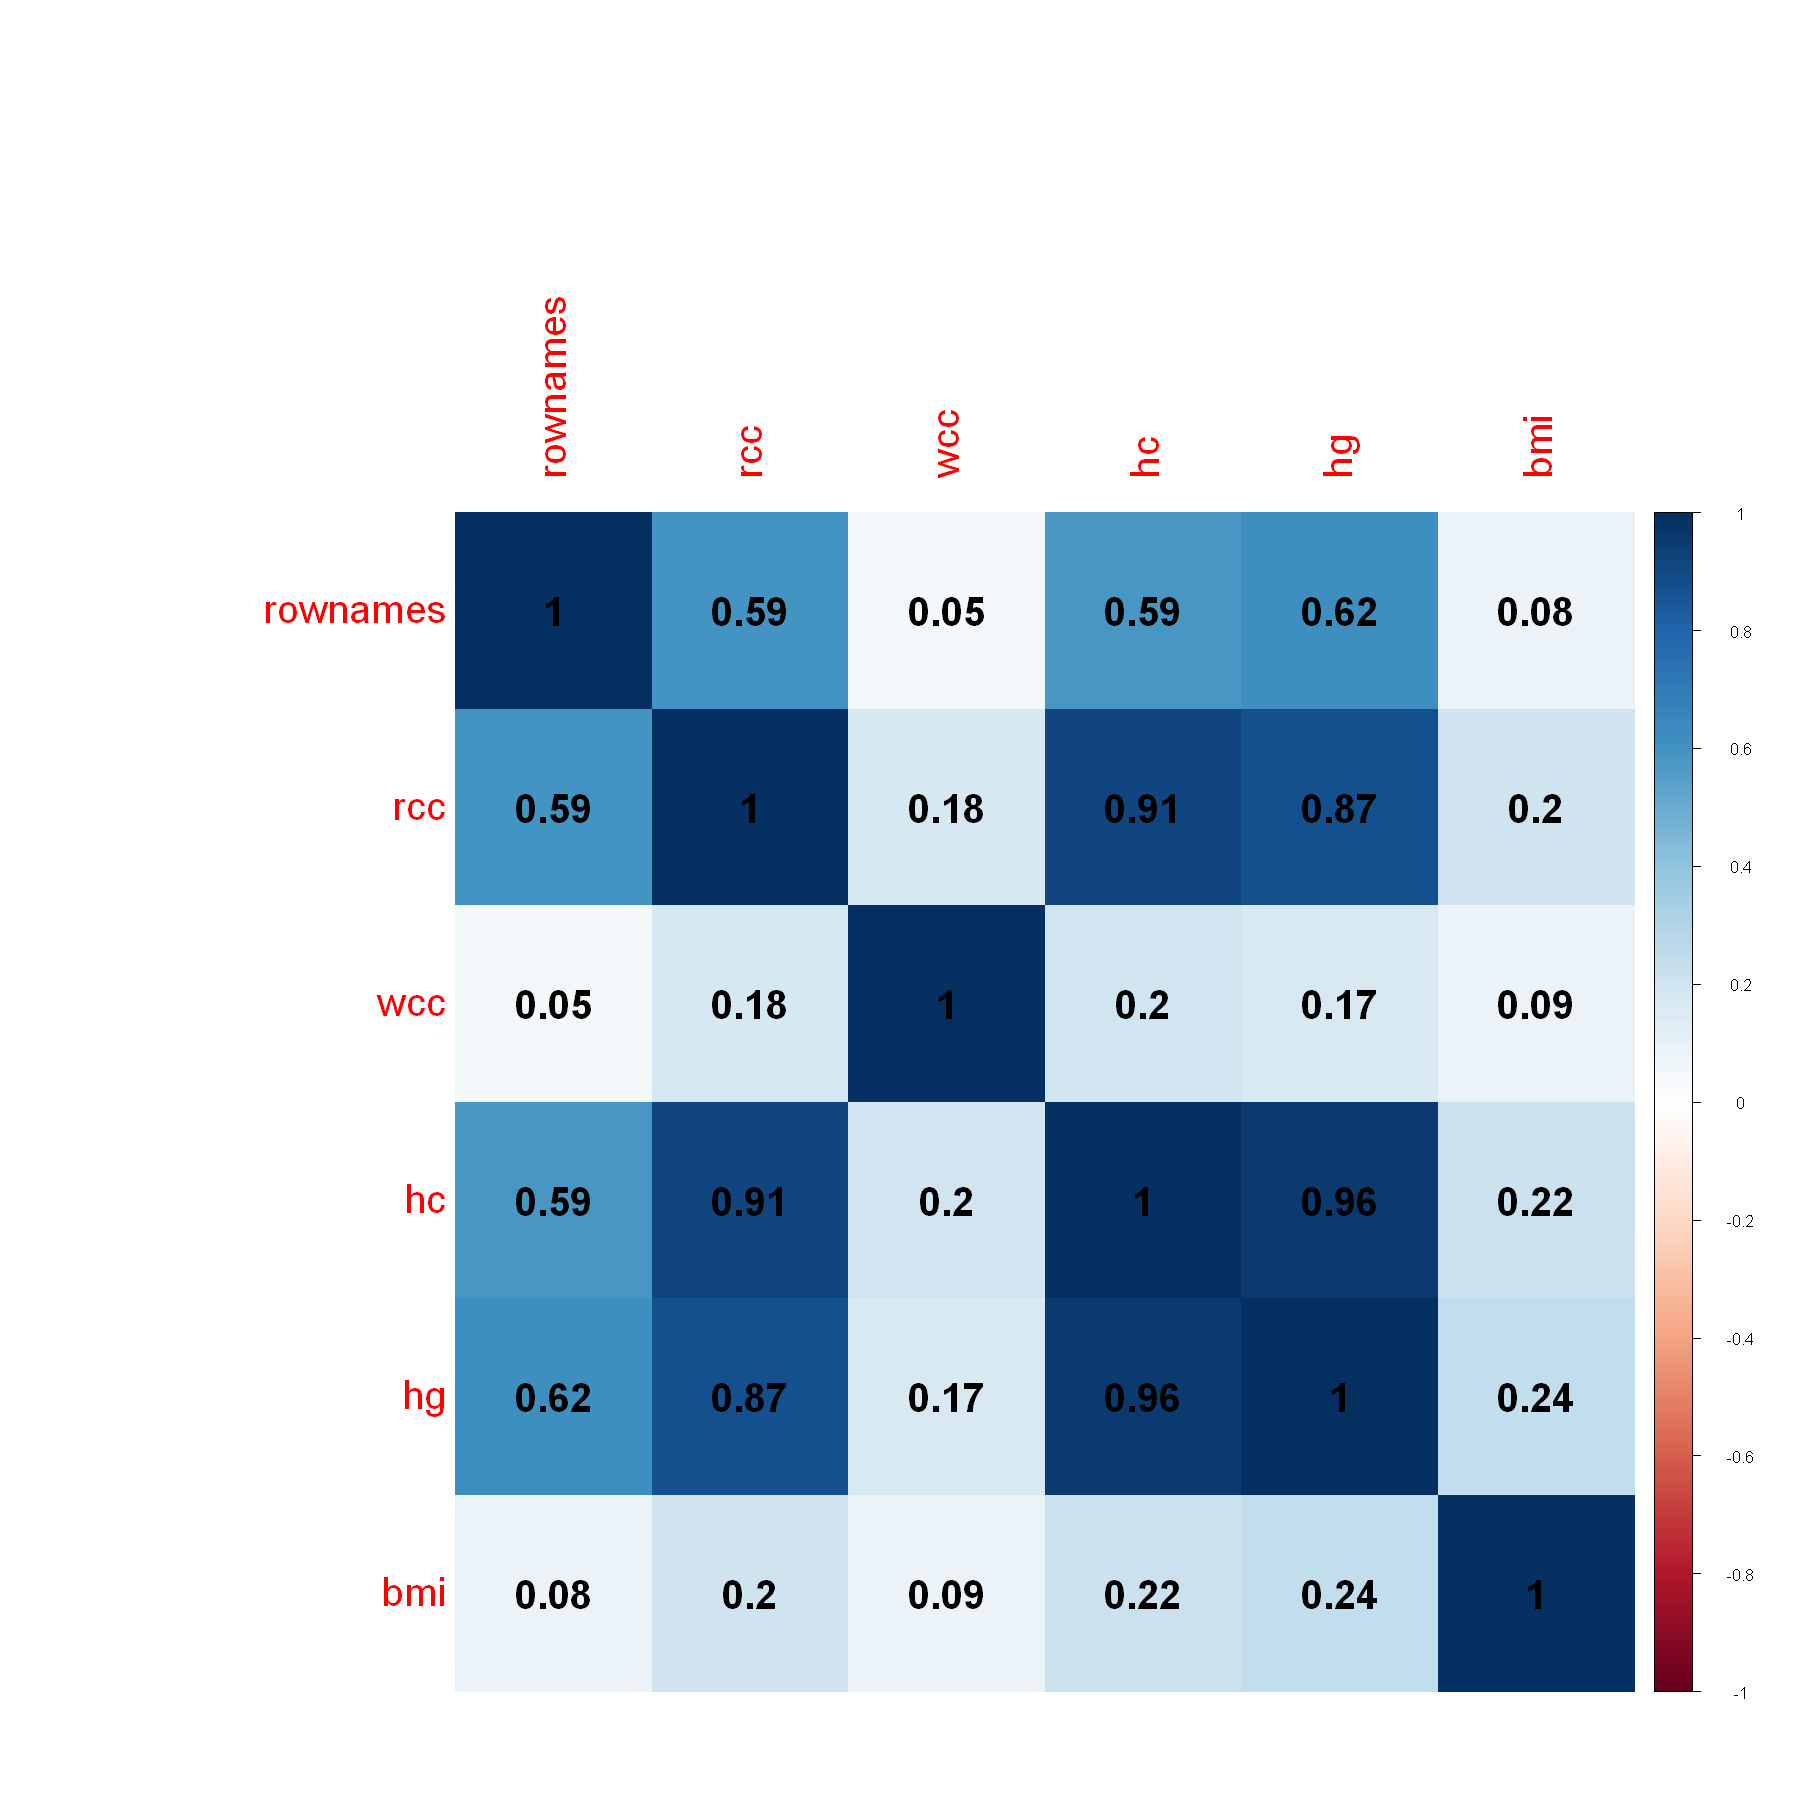

In [50]:
corrplot(cor(data_ais_numeric), method = "color",addCoef.col = "black", tl.cex = 2, number.cex = 2)

En este gráfico, vemos como claramente las dos variables que menos correlación tienen con el resto son wcc y bmi. Pero esto no implica que no tengan relación con el sexo o el tipo de deporte. 

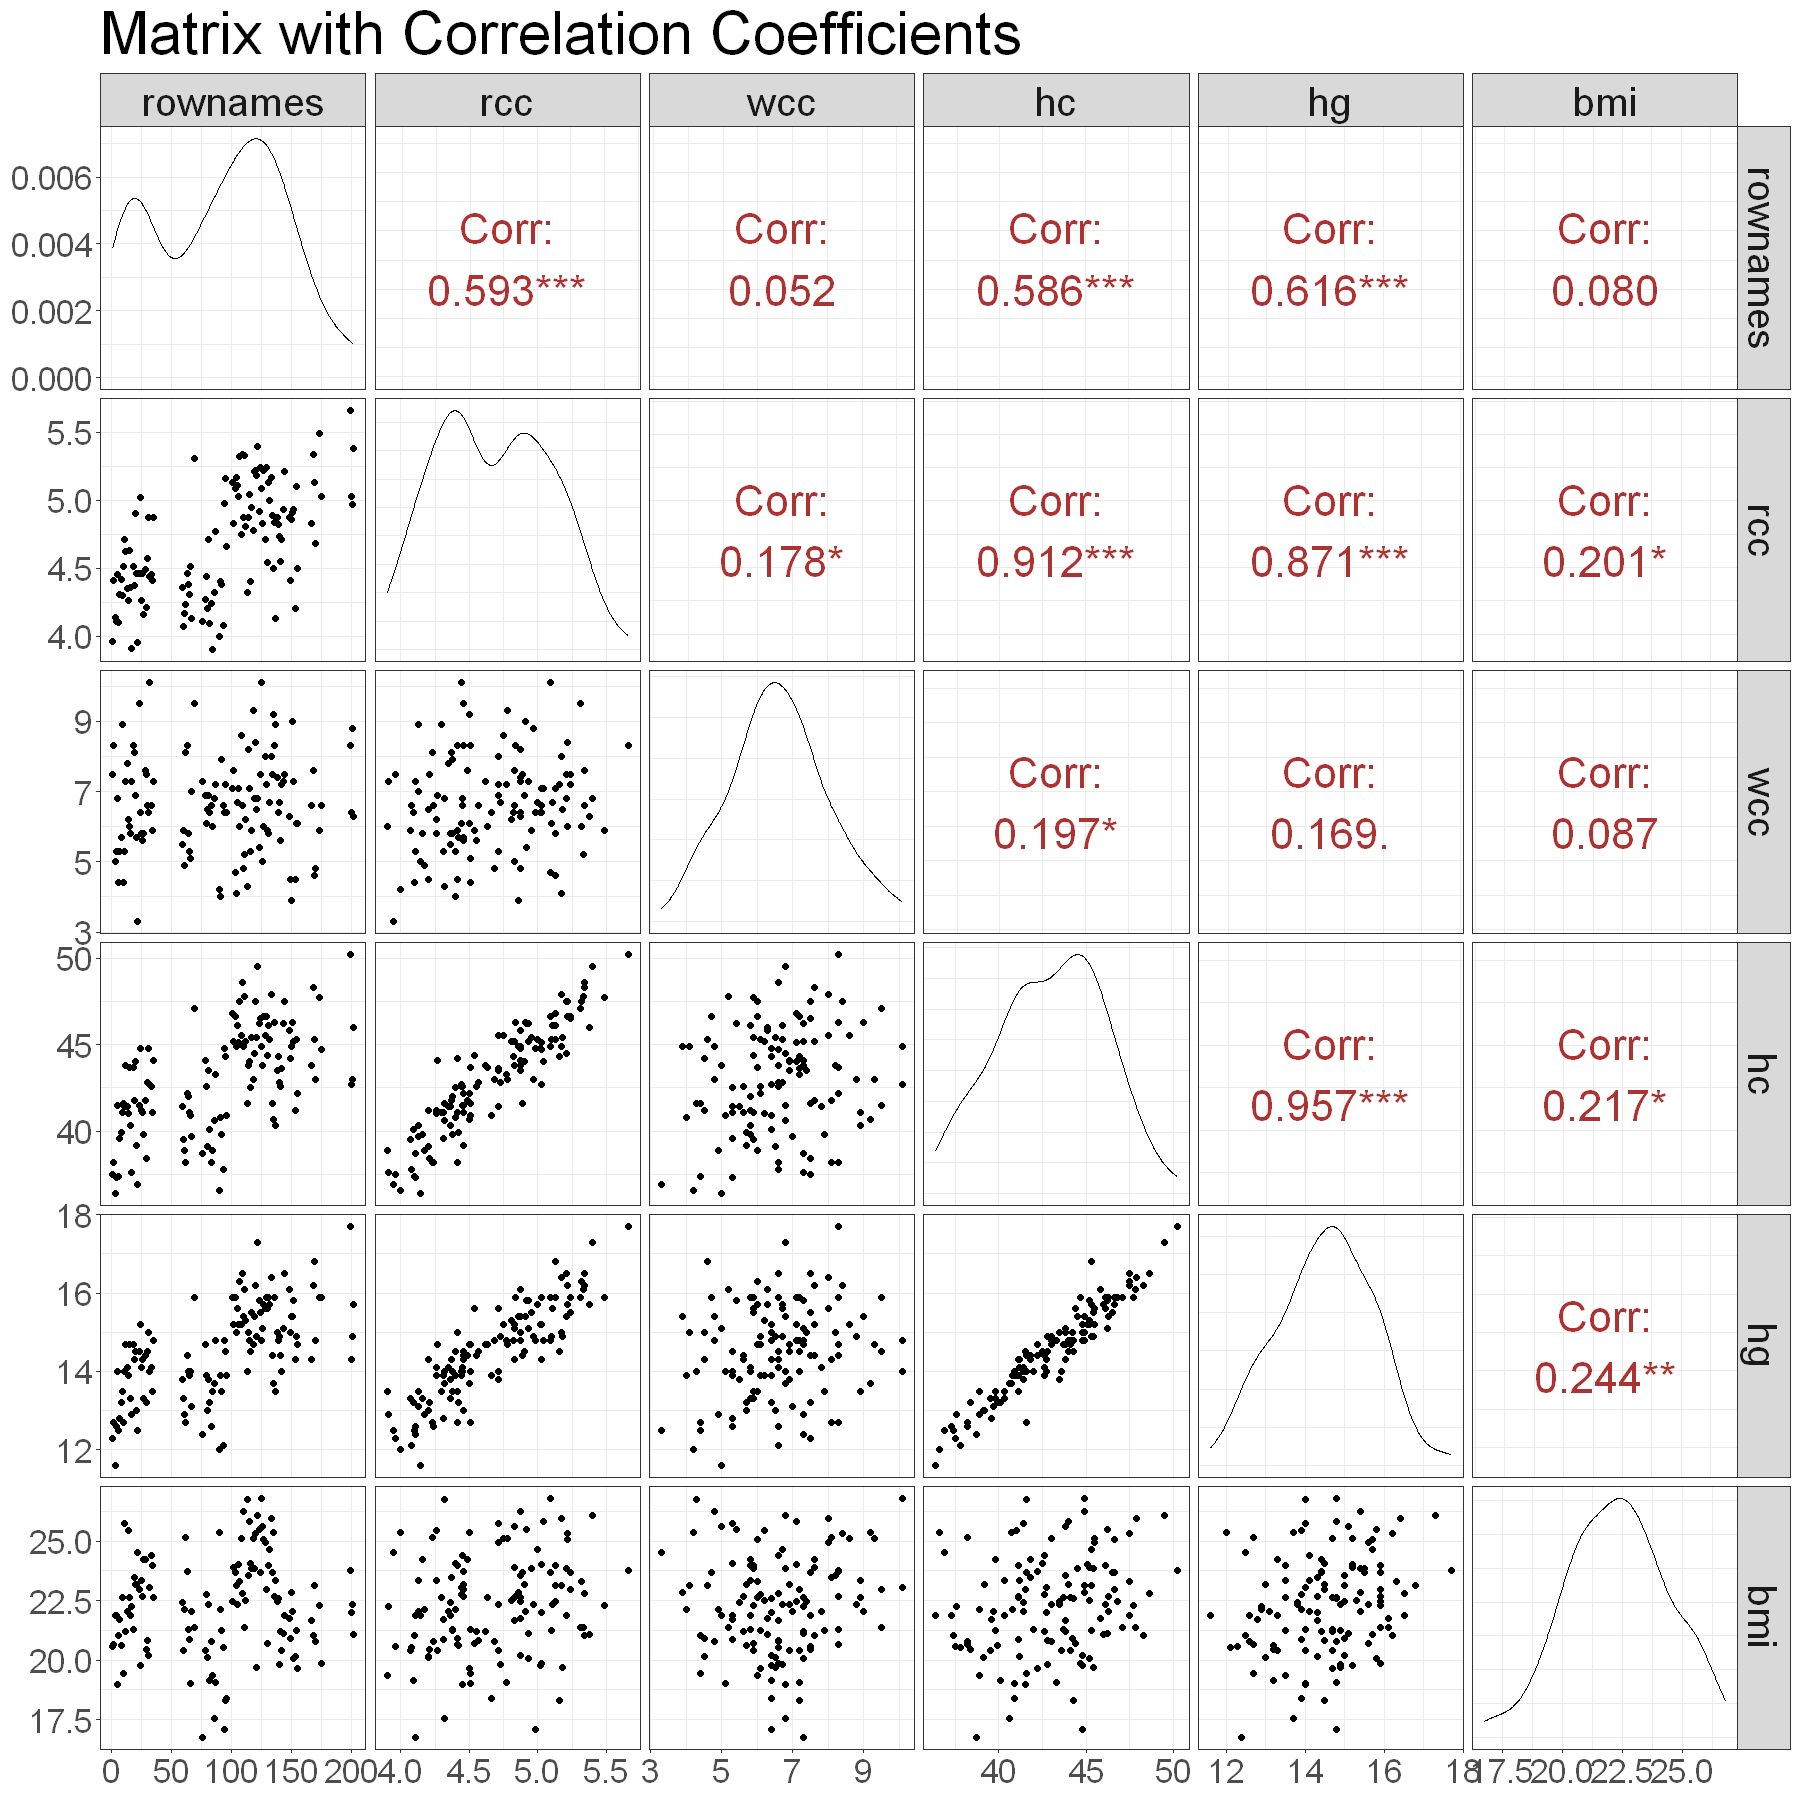

In [51]:
#Hacemos un pairplot para entender las relaciones que tenemos
ggpairs(
  data_ais_numeric,
  title = "Matrix with Correlation Coefficients",
  upper = list(continuous = wrap("cor", size = 9, color ='#ad3232'))) +
theme_bw() +
theme(
  text = element_text(size = 30), 
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 25)
)

Vemos como hg y hc estan altamente relacionadas puesto que se tratan las dos de diferentes metricas relacionadas con los globulos rojos, de igual manera que estas con la rcc. Sin embargo, el resto son nubes de puntes con poca correlación entre las demás.

## <font color='#3d59c6'>  3. TEST ANOVA </font>

### <font color='#3d59c6'>  3.1 Comprobación de supuestos </font>

#### Normalidad factor sex

In [52]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
categorias = c('f', 'm')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data_ais, sex == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

   Variable Cat   Shapiro PValor
W       rcc   f 0.9527609  0.018
W1      rcc   m 0.9796056  0.390
W2      wcc   f 0.9889641  0.852
W3      wcc   m 0.9871224  0.762
W4       hc   f 0.9822609  0.509
W5       hc   m 0.9917297  0.953
W6       hg   f 0.9853917  0.670
W7       hg   m 0.9881680  0.815
W8      bmi   f 0.9891767  0.862
W9      bmi   m 0.9737279  0.204


Todos los PValor > 0.05 (excepto rcc en el sexo femenino) aceptamos hipotesis nula en todas las variables (excepto en la de rcc para el sexo femenino) con todos los subconjuntos (normalidad)

#### Normalidad factor sport

In [54]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
categorias = c('B_Ball', 'Row','Swim','T_400m','Tennis')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data_ais, sport == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

    Variable    Cat   Shapiro PValor
W        rcc B_Ball 0.9668856  0.568
W1       rcc    Row 0.9659142  0.309
W2       rcc   Swim 0.9164542  0.064
W3       rcc T_400m 0.9755527  0.717
W4       rcc Tennis 0.9602871  0.775
W5       wcc B_Ball 0.9627397  0.472
W6       wcc    Row 0.9608115  0.214
W7       wcc   Swim 0.9621063  0.533
W8       wcc T_400m 0.9536983  0.228
W9       wcc Tennis 0.9146806  0.277
W10       hc B_Ball 0.9677765  0.589
W11       hc    Row 0.9884984  0.962
W12       hc   Swim 0.9381614  0.181
W13       hc T_400m 0.9613755  0.355
W14       hc Tennis 0.9783319  0.956
W15       hg B_Ball 0.9583881  0.383
W16       hg    Row 0.9782721  0.671
W17       hg   Swim 0.9457531  0.260
W18       hg T_400m 0.9780738  0.787
W19       hg Tennis 0.9399817  0.520
W20      bmi B_Ball 0.9694488  0.631
W21      bmi    Row 0.9622123  0.237
W22      bmi   Swim 0.9827718  0.954
W23      bmi T_400m 0.9578281  0.290
W24      bmi Tennis 0.9655063  0.838


Aceptamos hipotesis nula en todos los casos (p-value > 0.05), por lo tanto todos los subconjuntos de datos cumplen normalidad

#### Homocedasticidad factor sex

- $H_{0}$: las muestras presentan varianzas iguales
- $H_{1}$: las muestras presentan varianzas distintas

In [55]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sex, data = data_ais)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   0.1046790 0.7462853
Bartlett's K-squared1      wcc   0.1205474 0.7284416
Bartlett's K-squared2       hc   1.0434306 0.3070249
Bartlett's K-squared3       hg   0.4223403 0.5157716
Bartlett's K-squared4      bmi   0.2849915 0.5934481


Aceptamos H0 para todos los subconjuntos de datos

#### Homocedasticidad factor sport

- $H_{0}$: las muestras presentan varianzas iguales
- $H_{1}$: las muestras presentan varianzas distintas

In [57]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sport, data = data_ais)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   2.7209300 0.6055571
Bartlett's K-squared1      wcc   0.9647336 0.9150955
Bartlett's K-squared2       hc   2.4492440 0.6537469
Bartlett's K-squared3       hg   5.1199980 0.2752051
Bartlett's K-squared4      bmi   4.3053131 0.3662603


Aceptamos H0 para todos los subconjuntos de datos

### <font color='#3d59c6'>  3.2 ONE-WAY </font>

Las variables continuas escogidas para realizar el test ONE-WAY con el factor sport son: rcc y wcc

Estas variables, han sido escogidas, ya que cuando se ha verificado la normalidad para los subgrupos con sexo, se ha analizado que la rcc no tenia un comportamiento normal en un subgrupo de sexo, sin embargo para lo subgrupos de sport, todas las variables han moestrado un comportamiento normal. Y como hay que escoger 2 y 2, y no se pueden repetir, se han escogido estas.

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

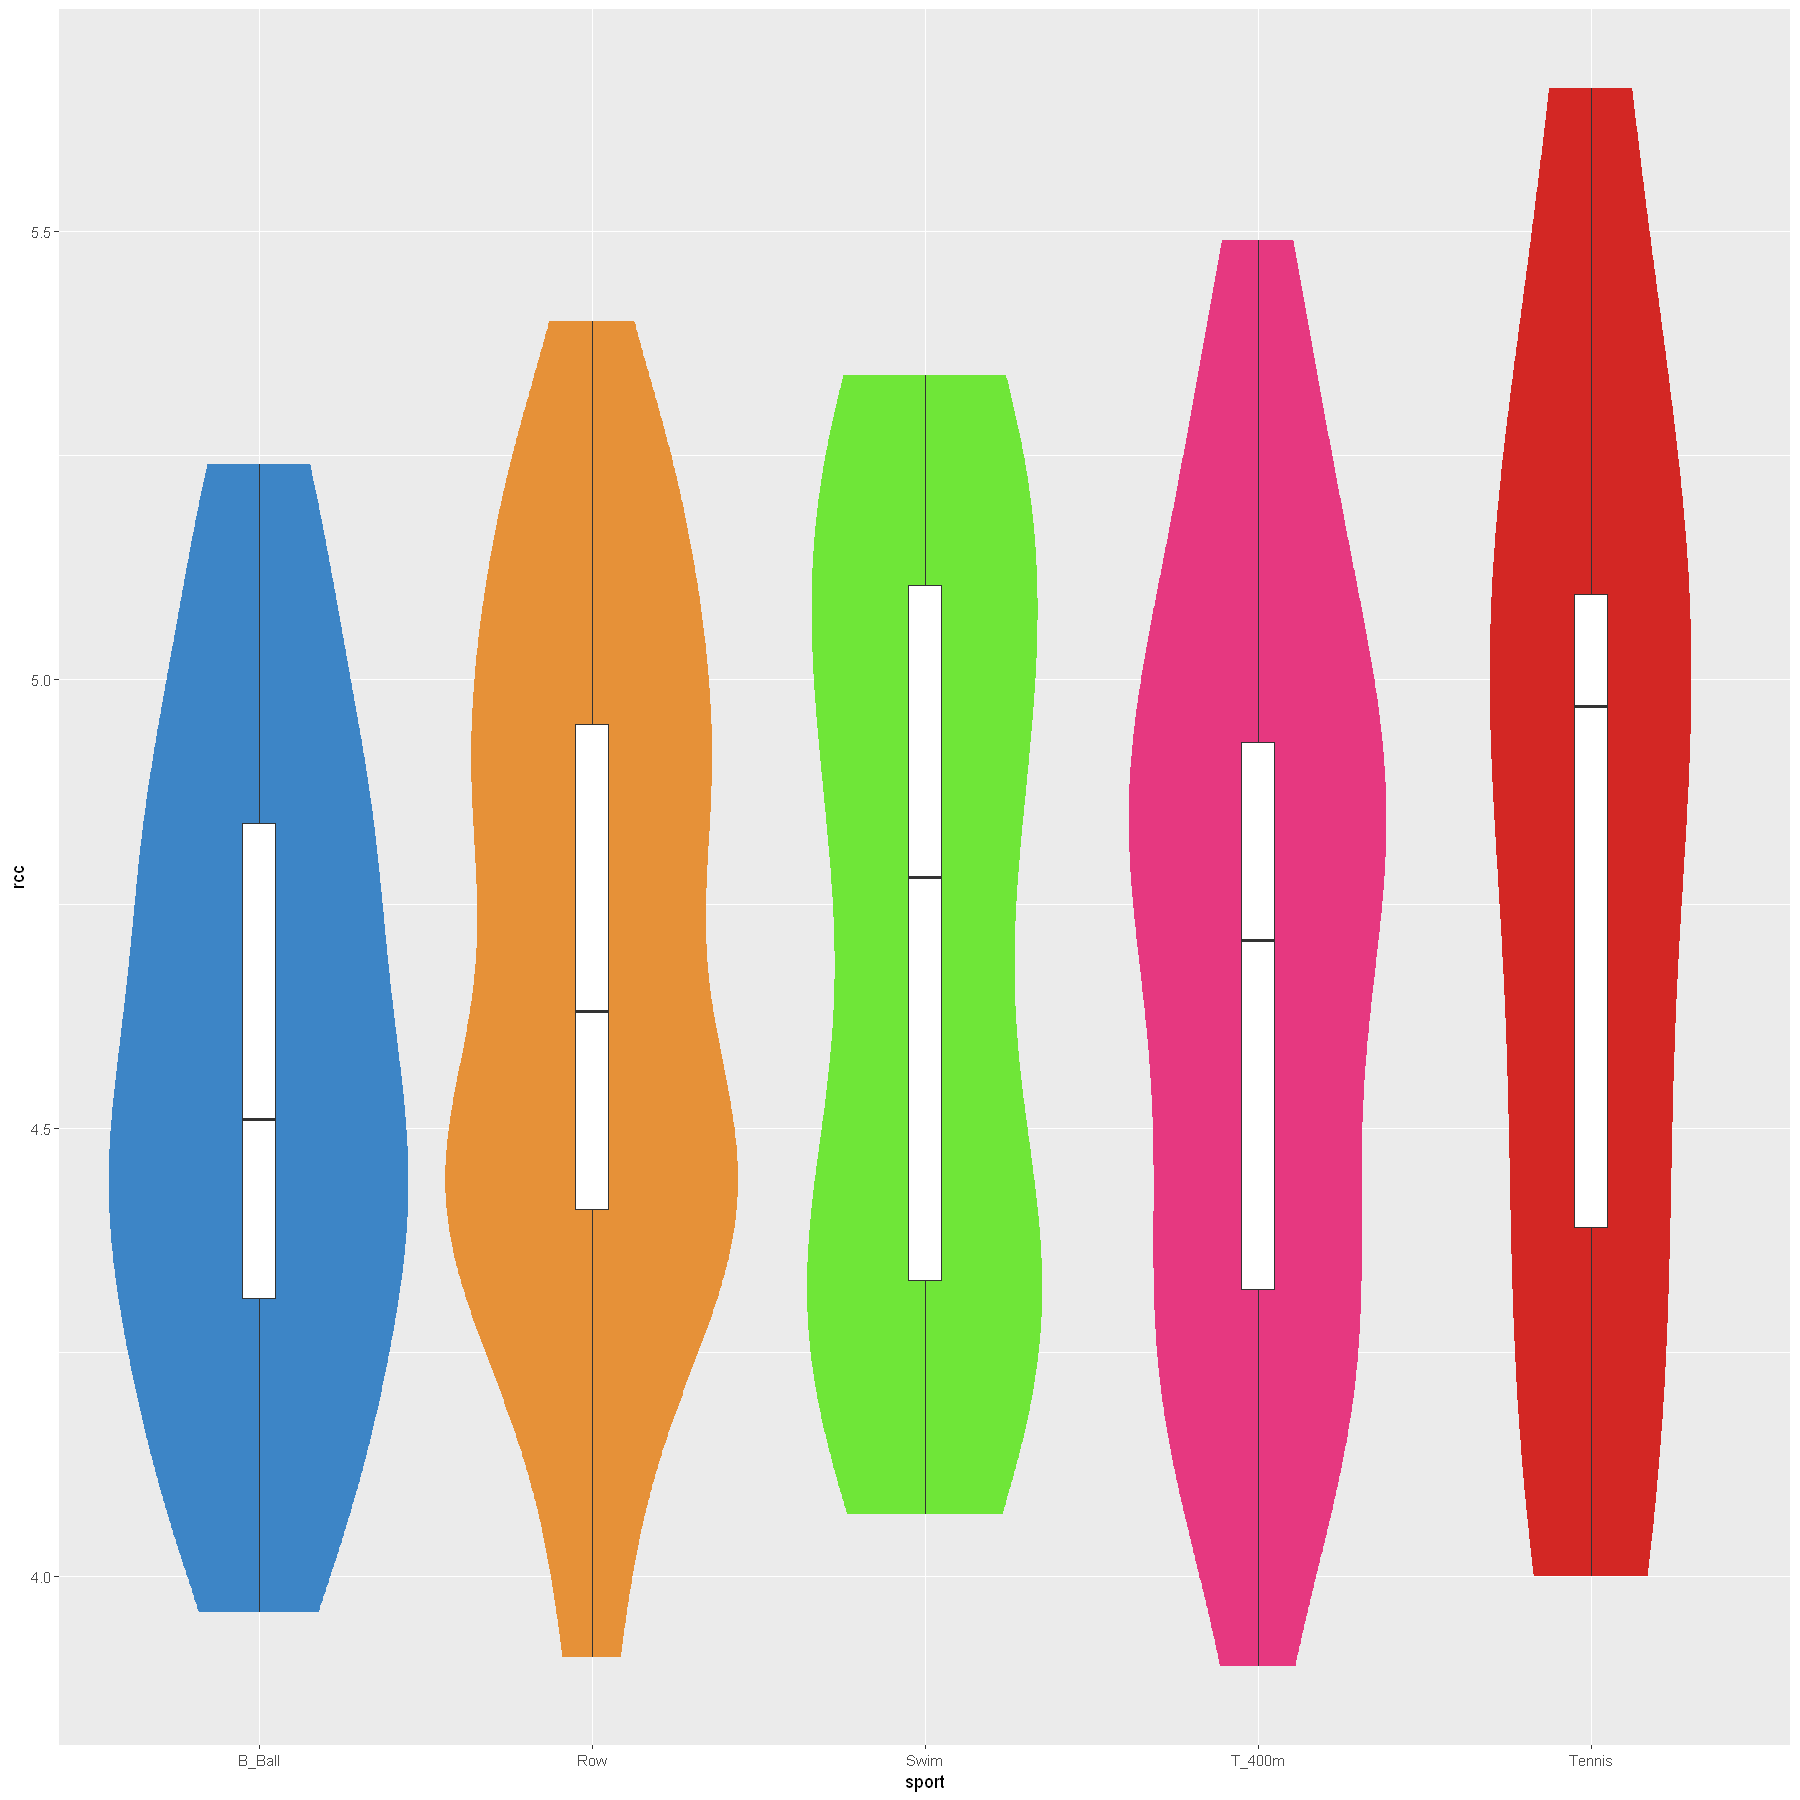

In [62]:
ggplot(data_ais, aes(sport, rcc)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = '#3d85c6', 'Row' = '#e69138', 'Swim' = '#6fe638', 'T_400m' = '#e63880', 'Tennis' = '#d32724'))

In [63]:
anova = aov(rcc ~ sport, data = data_ais)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4  0.466  0.1164   0.687  0.603
Residuals   119 20.168  0.1695               

Este resultado nos indica con un p-valor > 0.05 que debemos aceptar nuestra hipótesis nula y por lo tanto no hay diferencia significativa entre grupos. Esto se podía intuir en el gráfico de violín pero con el test anova lo hemos verificado.

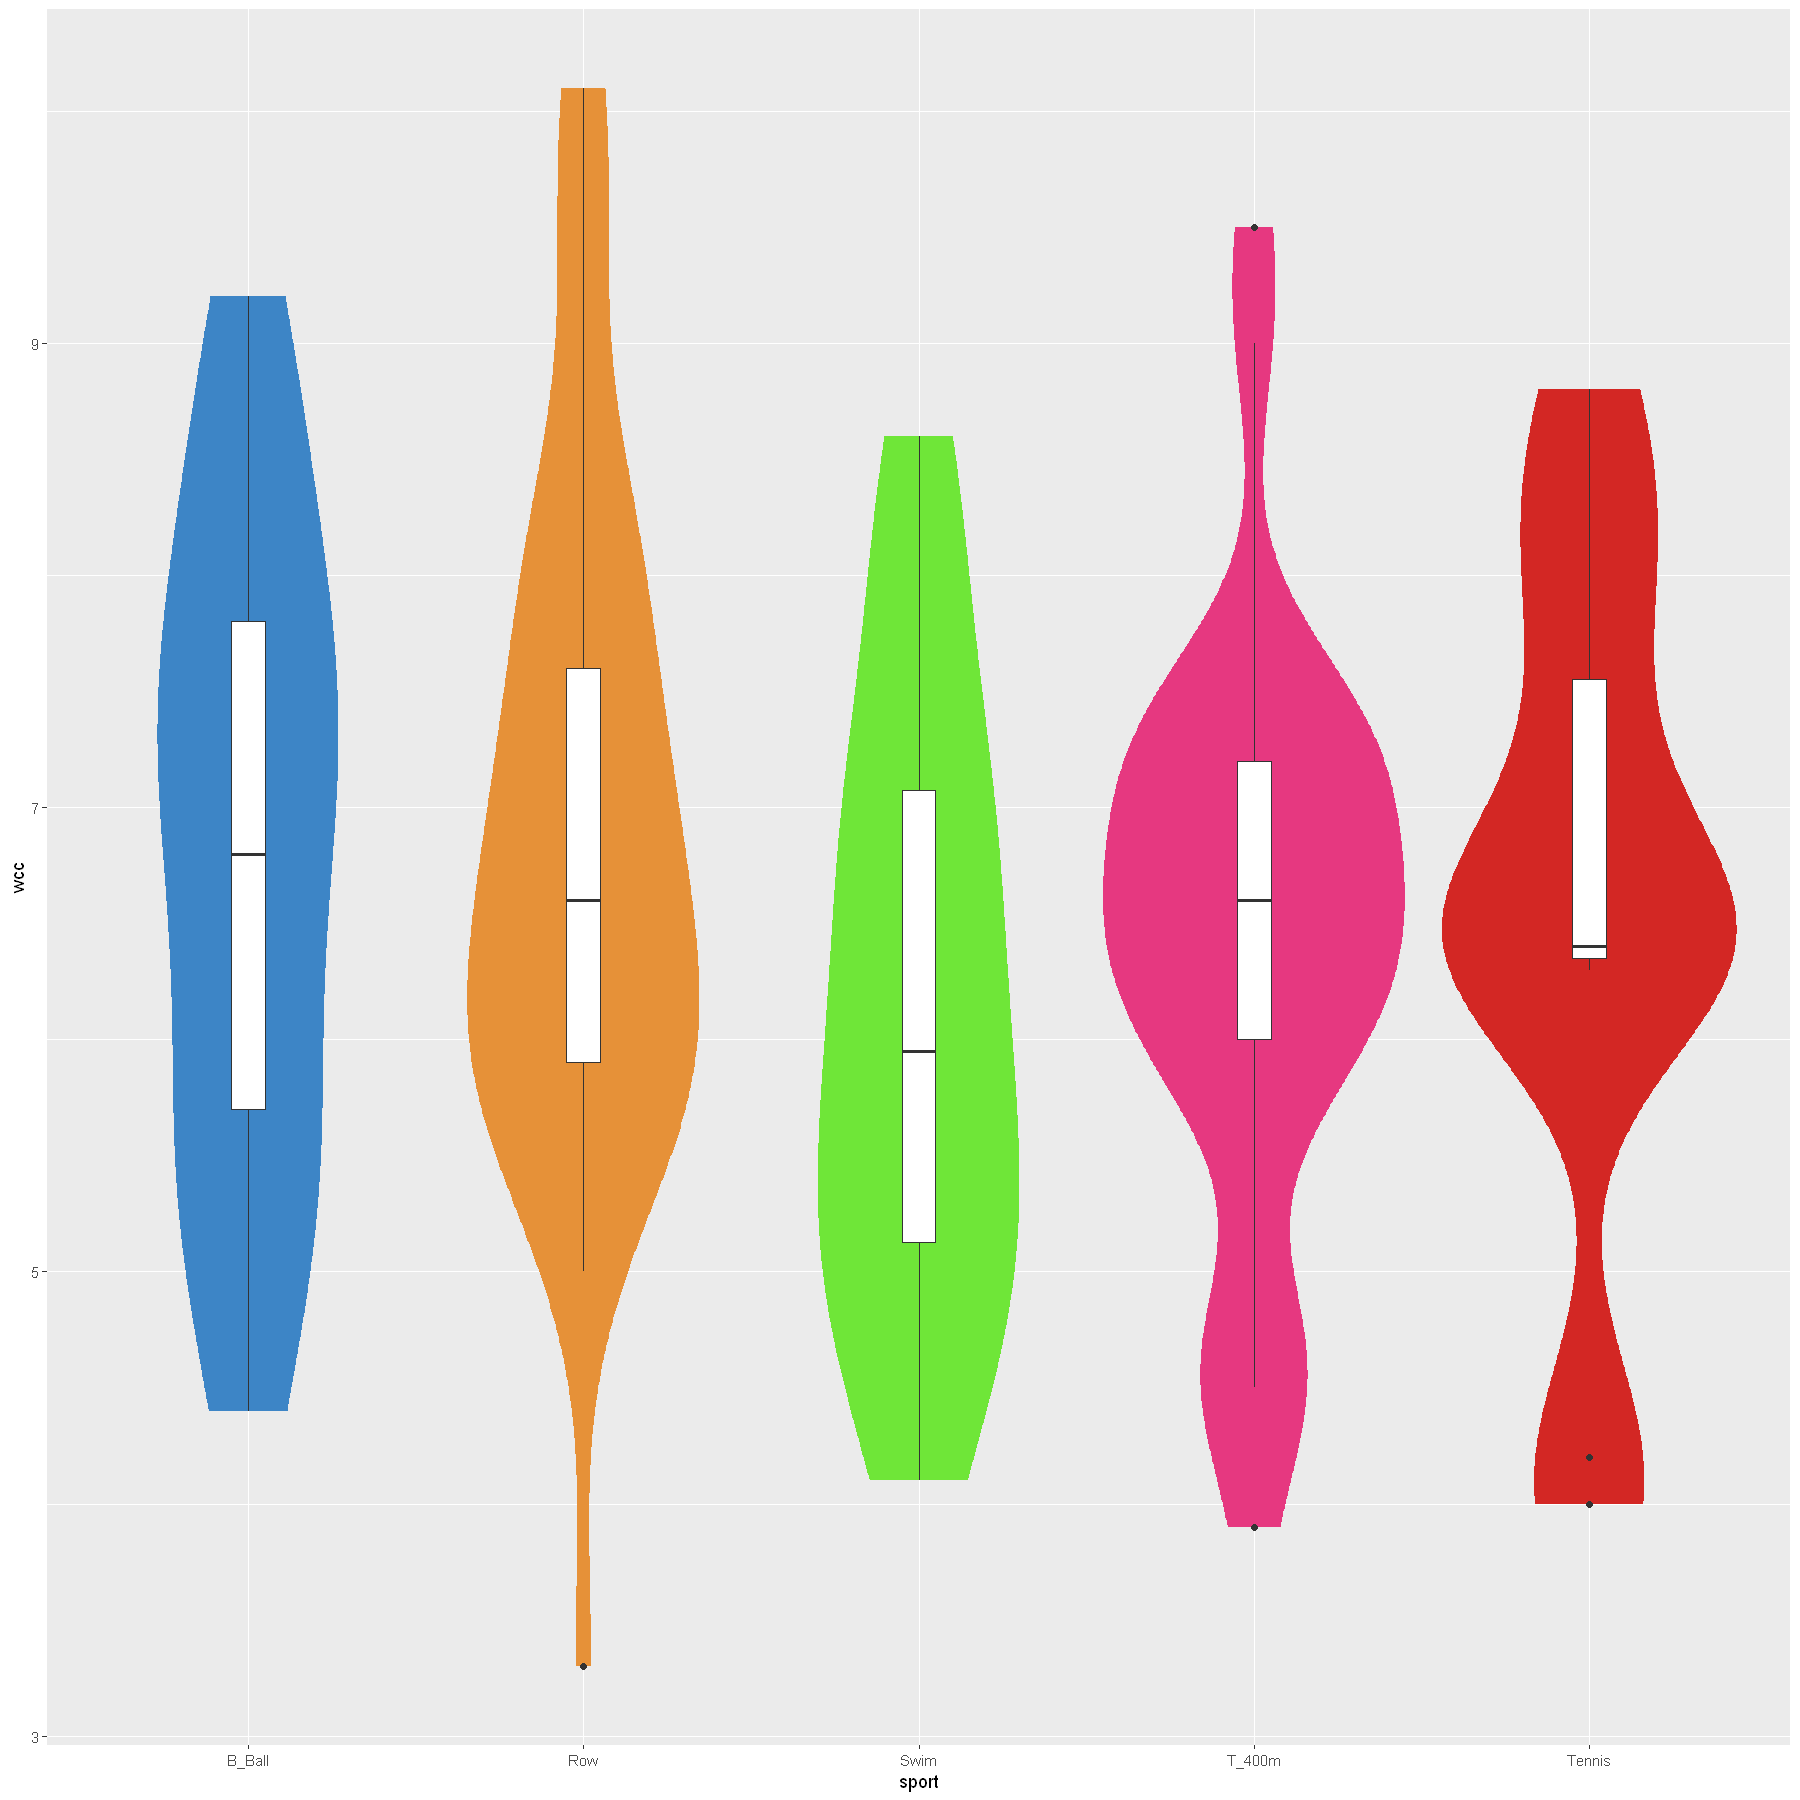

In [64]:
ggplot(data_ais, aes(sport, wcc)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = '#3d85c6', 'Row' = '#e69138', 'Swim' = '#6fe638', 'T_400m' = '#e63880', 'Tennis' = '#d32724'))

In [65]:
anova = aov(wcc ~ sport, data = data_ais)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4   9.45   2.363    1.24  0.298
Residuals   119 226.73   1.905               

Este resultado tambien nos indica con un p-valor > 0.05 que debemos aceptar nuestra hipótesis nula y por lo tanto no hay diferencia significativa entre grupos. Esto se podía intuir en el gráfico de violín pero con el test anova lo hemos verificado.

### <font color='#3d59c6'>  3.3 TWO-WAY </font>

Las variables continuas escogidas para realizar el test TWO-WAY con el factor sport son: bmi y hg

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

In [66]:
data_ais_two = data_ais[, c('sport','sex','bmi', 'hg')]
head(data_ais_two)

,sport,sex,bmi,hg
,<chr>,<chr>,<dbl>,<dbl>
1,B_Ball,f,20.56,12.3
2,B_Ball,f,20.67,12.7
3,B_Ball,f,21.86,11.6
4,B_Ball,f,21.88,12.6
5,B_Ball,f,18.96,14.0
6,B_Ball,f,21.04,12.5


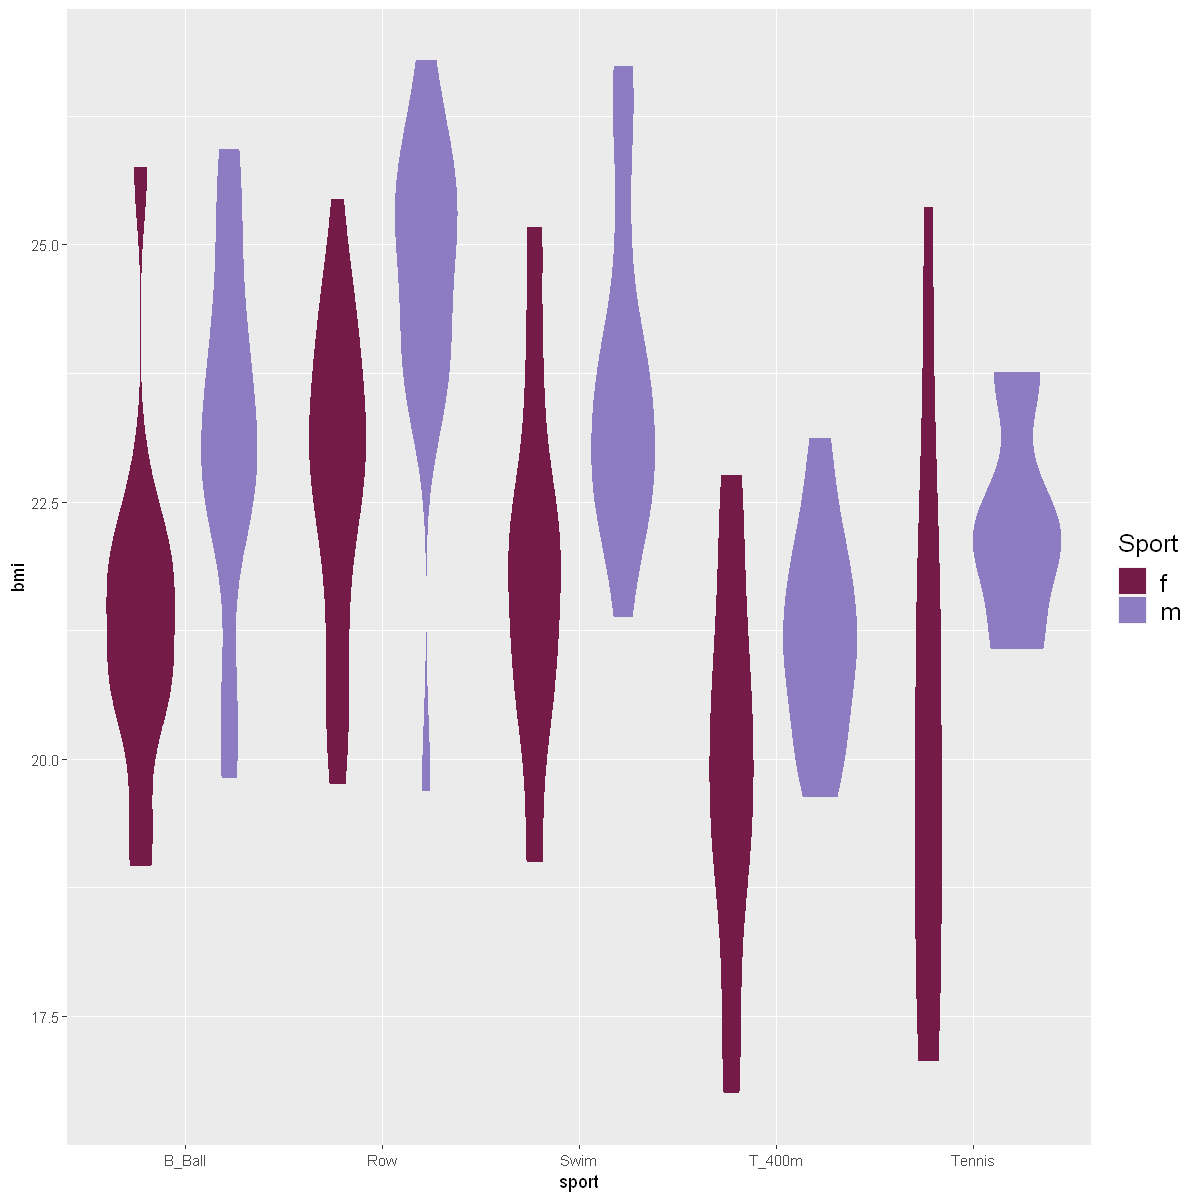

In [67]:
options(
  repr.plot.width = 10,  
  repr.plot.height = 10  
)
ggplot(data_ais_two, aes(sport, bmi, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right'
        ,legend.text = element_text(size = 15)
        ,legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('f' = '#741b47', 'm' = '#8e7cc3')) +
  labs(fill = 'Sport')

Vemos como en este caso, de primeras si que podemos notar claras diferencias entre los indices de masa corporal entre mujeres y hombres y tambien dependiendo del deporte que se juega, ya que no  tendrá la misma masa muscular un deportista que juega a baloncesto con uno que juega a tennis.

In [68]:
anova = aov(bmi ~ sport * sex, data = data_ais)
summary(anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
sport         4 148.11   37.03  13.483 4.97e-09 ***
sex           1  84.18   84.18  30.652 2.00e-07 ***
sport:sex     4   1.68    0.42   0.153    0.961    
Residuals   114 313.08    2.75                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

El resultados nos da muy parecido a lo que se obvservaba en la imagen, puesto que por separado las dos variables categoricas si que influyen mucho en el indice de masa corporal, pero en cambio las dos juntos no afectan. Esto tiene sentido ya que una chica que juega a baloncesto, puede tener la misma masa corporal que un chico que juega a tenis por ejemplo. Así pues, las dos combinadas no tienen impacto (p valor >> 0.05).

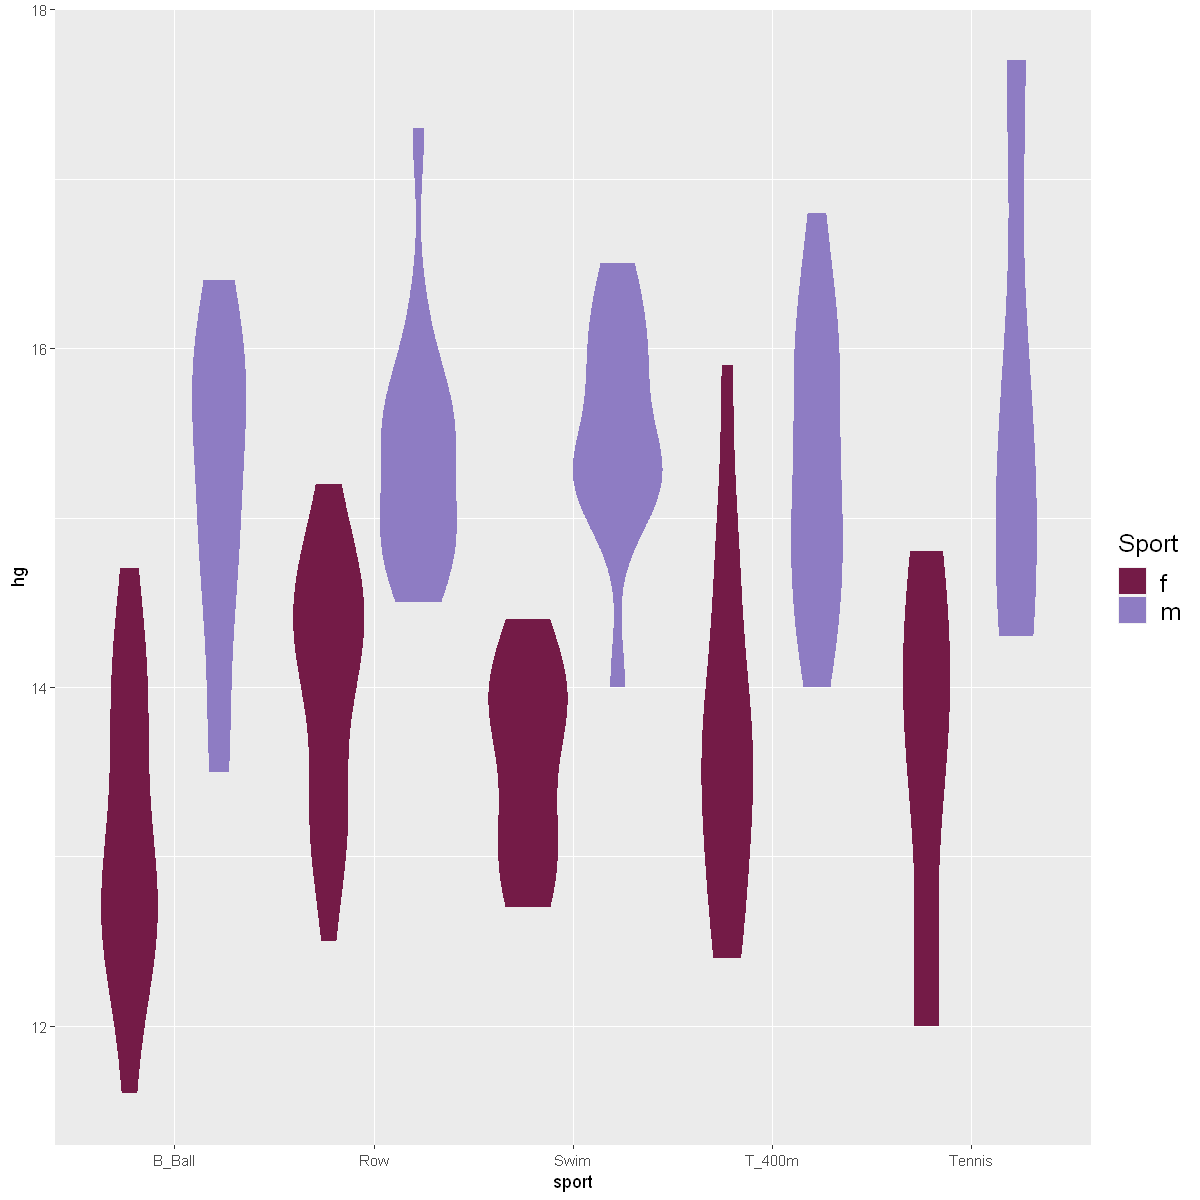

In [69]:
options(
  repr.plot.width = 10,  
  repr.plot.height = 10  
)
ggplot(data_ais_two, aes(sport, hg, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right'
        ,legend.text = element_text(size = 15)
        ,legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('f' = '#741b47', 'm' = '#8e7cc3')) +
  labs(fill = 'Sport')

En la grafica se ve claramente como la única variable que tiene impacto en nuestra variable hg es el sexo. Y esto es debido a que la concentración de hemoglobina es diferente para hombres que para mujeres. En general, los hombres tienden a tener niveles más altos de hemoglobina que las mujeres. Esta diferencia se debe principalmente a los efectos hormonales, en particular el impacto de las hormonas sexuales como la testosterona en los hombres, que estimula la producción de hemoglobina.

In [70]:
anova = aov(hg ~ sport * sex, data = data_ais)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
sport         4   7.20    1.80   2.529 0.0444 *  
sex           1  86.52   86.52 121.641 <2e-16 ***
sport:sex     4   2.62    0.65   0.920 0.4550    
Residuals   114  81.09    0.71                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

En el test se verifica como el pvalor para el sexo es cercano a 0, sin embargo vemos que el factor deporte tambien tiene un impacto en la hemoglobina, ya que el pvalor es <0.05 pero por muy poco. Y es que el tipo de deporte practicado puede influir en los niveles de hemoglobina en la sangre, principalmente debido a las diferentes demandas de oxígeno y los efectos sobre el volumen sanguíneo y la producción de glóbulos rojos asociados con diversos tipos de actividad física. Sin embargo, ambas conjuntas no tienen ningún impacto.

## <font color='#3d59c6'>  5. CONCLUSIONES </font>

En esta entrega se ha visto un método muy útil para evaluar las diferentes variables categoricas y ver como estas afectan las unas con las otras. Se verifica lo importante que s verificar los supuestos y realizar analisis previos para guiar el enfoque del problema. Hemos visto basandonos en los resultados como hay biometricas del ser humano que dependen del sexo y como hay otras que no lo depende. Se ha descubierto matématica mente como el deporte puede afectar al comportamiento de nuestro organismo y se respalda la importancia de este para mantener el cuerpo con buena salud.